---
#  --------- **Lab Report 04** -----------
> ## **Name   : Muhammad Ehtisham Saleem**
> ## **Reg No : B22F1242AI108**
> ## **Lab : Digital Image Processing**
 >## **Submitted To : Rizwan Shah**
>## **Course Instructor : Dr. Abdul Jalil**
---

---



# **Image Processing Techniques in Spatial Domain**
> This lab focuses on applying image processing techniques to enhance various types of images for real-world applications. Students will work on four scenarios, including medical image enhancement, license plate recognition, satellite disaster assessment, and digital manuscript restoration. Techniques such as Fourier Transform, log transformation, contrast stretching, and thresholding will be applied to improve visibility, remove noise, and highlight important details. The goal is to develop practical skills in digital image enhancement for medical, surveillance, environmental, and archival purposes.









## **Libraries Used:**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# **Scenario no 01 : Medical Image Analysis (X-ray & MRI Enhancement)**

* These image enhancement techniques improve medical images by adjusting brightness, contrast, and visibility of essential features.
* The purpose is to make abnormalities, like tumors or fractures, easier to detect, and the application involves enhancing the contrast and details of soft tissues, bones, and other important structures in X-ray and MRI scans.

## **Load the Image in Grayscale**



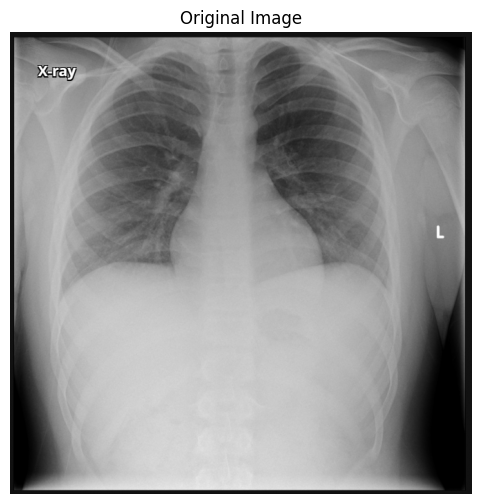

In [ ]:
image_path = "xray-1.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not loaded. Check the path.")
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()



## **Explanation:**

* The image is read in grayscale mode, where each pixel represents the brightness of the image, simplifying the process of applying enhancement techniques on medical images like X-rays and MRIs.
* Grayscale images focus on intensity, which is useful for enhancing bone structures and soft tissues in medical imaging.

## **Step 1: Compute Mean and Variance**

In [ ]:
# Compute mean and variance
mean, variance = cv2.meanStdDev(image)
print(f"Mean (Brightness): {mean[0][0]}")
print(f"Variance (Contrast): {variance[0][0]}")


Mean (Brightness): 188.1802827498812
Variance (Contrast): 35.558786305126155


## **Explanation:**

* The mean (brightness) and variance (contrast) are calculated to assess the overall image quality. Low mean values may indicate darker images, while low variance suggests poor contrast.
* These values help identify images that may require enhancement, as low contrast or brightness could hinder the detection of abnormalities like tumors in medical scans.


## **Step 2: Apply Log Transformation**

<ipython-input-41-44478cb10e9a>:3: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + image)
<ipython-input-41-44478cb10e9a>:4: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.uint8(log_transformed)


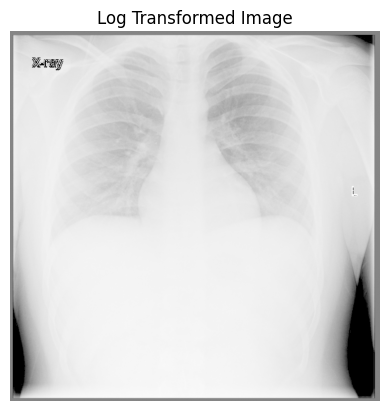

In [ ]:
# Apply log transformation
c = 255 / np.log(1 + np.max(image))
log_transformed = c * np.log(1 + image)
log_transformed = np.uint8(log_transformed)
plt.figure()
plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()


## **Explanation:**

* Logarithmic transformation enhances dark regions, making faint details more visible, especially in medical images like MRIs.
* This is helpful for highlighting low-intensity areas like soft tissues, which are often harder to detect in low-contrast images

## **Step 3: Apply Inverse Log Transformation**

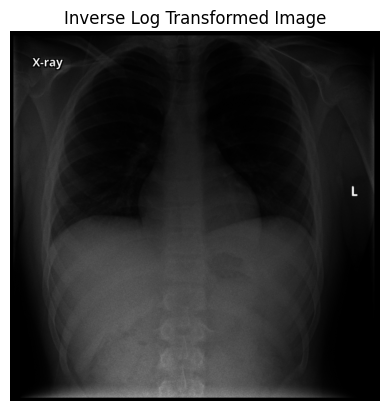

In [ ]:
# Apply inverse log transformation
inverse_log_transformed = np.exp(image / c) - 1
inverse_log_transformed = np.uint8(inverse_log_transformed)
plt.figure()
plt.imshow(inverse_log_transformed, cmap='gray')
plt.title("Inverse Log Transformed Image")
plt.axis("off")
plt.show()


## **Explanation:**

* The inverse log transformation reverses the previous log enhancement, aiming to restore the original intensity variations while preserving key details.
* It helps keep the natural contrast intact, ensuring that previously enhanced soft tissue and bone structures are retained without losing valuable information.

## **Step 4: Apply Contrast Stretching**

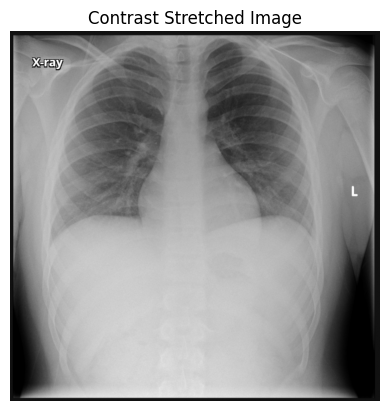

In [ ]:
# Apply contrast stretching
min_val = np.min(image)
max_val = np.max(image)
stretched_image = (image - min_val) * (255 / (max_val - min_val))
stretched_image = np.uint8(stretched_image)
plt.figure()
plt.imshow(stretched_image, cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis("off")
plt.show()


## **Explanation:**

* Contrast stretching expands the pixel intensity values to cover the entire 0-255 range, improving the image's overall contrast.
* This is useful for emphasizing differences in tissue density, such as distinguishing between bones and soft tissues, which is crucial for diagnosing conditions in X-rays and MRIs.

## **Step 5: Apply Thresholding**


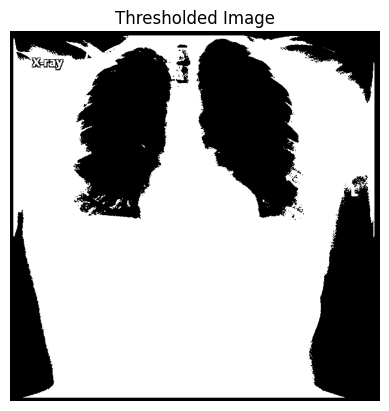

In [ ]:
# Apply thresholding
threshold_value = 128
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()


## **Explanation:**

* Thresholding converts the grayscale image into a binary image, isolating key features like bones or tumors based on a set intensity threshold.
* This simplifies the image and highlights critical structures, making it easier to analyze specific regions, such as identifying fractures or abnormalities in medical scans.



---



# **Scenario no 02 : License Plate Recognition in Traffic Monitoring**

 >The license plate image is processed by converting it to grayscale, enhancing contrast, applying thresholding, and using log transformation to improve visibility in low-light conditions. Finally, mean and variance are computed to dynamically adjust brightness for better recognition accuracy.










## **Load and Display the Original Image**

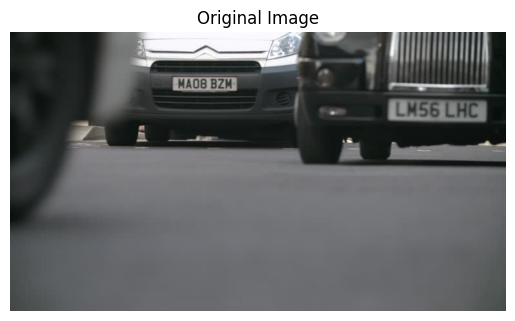

In [ ]:
# Load the image
image_path = "road-2.png"
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis("off")
plt.show()


## **Task 1: Convert Image to Grayscale**



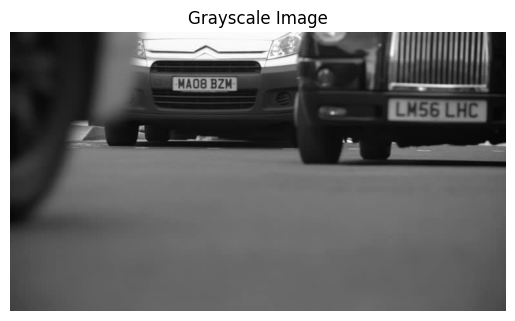

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()


## **Explanation:**

* The image is converted to grayscale, which simplifies it by removing the color information. This makes it easier to process because only the brightness levels are retained.
* This transformation is necessary for license plate recognition since the focus is primarily on text contrast rather than color, reducing computational complexity.

## **Task 2: Apply Gray Level Transformation to Improve Visibility**

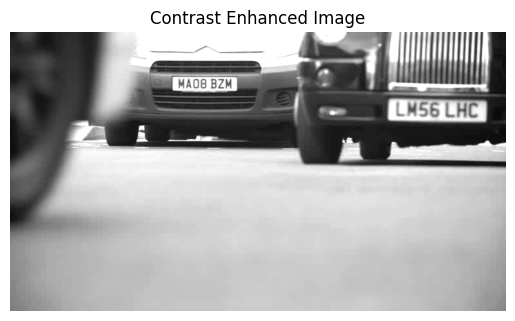

In [ ]:
# transformation for contrast enhancement

contrast_enhanced = cv2.convertScaleAbs(gray_image, alpha=1.5, beta=50)
plt.imshow(contrast_enhanced, cmap="gray")
plt.axis('off')
plt.title('Contrast Enhanced Image')
plt.show()


## **Explanation:**

* The contrast and brightness of the grayscale image are adjusted to enhance the visibility of the license plate text. By changing the contrast and brightness values, the text becomes more distinct from the background.
* Enhancing the contrast is crucial for making the license plate characters more readable, especially under varying lighting conditions.

## **Task 3: Use Thresholding Function to Separate Text from the Background**

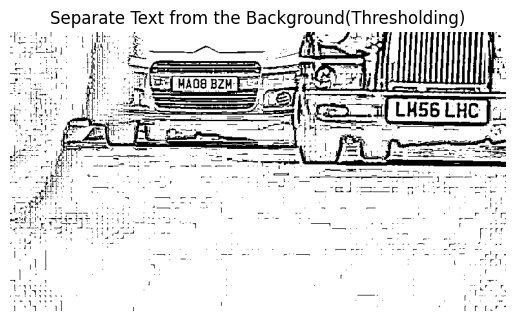

In [ ]:
#  to separate the text from the background
binary_image = cv2.adaptiveThreshold(contrast_enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(binary_image, cmap="gray")
plt.axis('off')
plt.title('Separate Text from the Background(Thresholding)')
plt.show()


## **Task 4: Apply Log Transformation to Enhance Low-Light Images**

<ipython-input-62-46c2b0c527c6>:1: RuntimeWarning: divide by zero encountered in log
  log_transformed = np.uint8(205 * (np.log(1 + contrast_enhanced) / np.log(1 + np.max(contrast_enhanced))))
<ipython-input-62-46c2b0c527c6>:1: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.uint8(205 * (np.log(1 + contrast_enhanced) / np.log(1 + np.max(contrast_enhanced))))


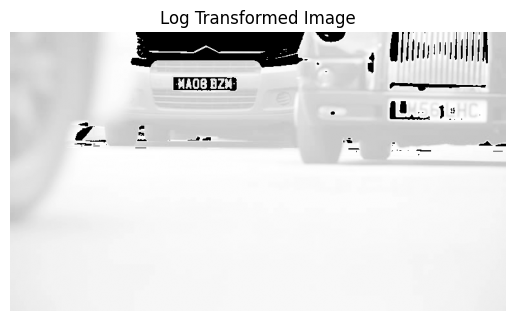

In [ ]:

log_transformed = np.uint8(205 * (np.log(1 + contrast_enhanced) / np.log(1 + np.max(contrast_enhanced))))
plt.imshow(log_transformed, cmap='gray')
plt.axis('off')
plt.title('Log Transformed Image')
plt.show()


# **Explanation:**

* Logarithmic transformation is applied to the contrast-enhanced image to enhance the visibility of details in darker regions. This transformation helps bring out features that are hard to see in low-light conditions.
* Enhancing low-light areas makes the license plate more visible, even in nighttime or shadowed conditions, improving recognition accuracy.

## **Task 5: Compute Mean and Variance to Adjust Brightness Dynamically**

In [ ]:
mean= cv2.meanStdDev(log_transformed)
stddev = cv2.meanStdDev(log_transformed)
print(f"Mean Intensity: {mean[0][0]}")
print(f"Variance: {stddev[0][0]**2}")

Mean Intensity: [178.64871781]
Variance: [31915.36437502]


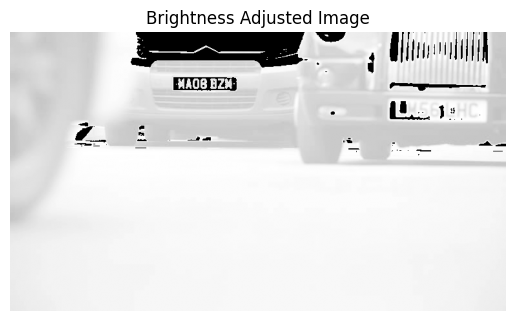

In [ ]:
if mean[0][0] < 100:
    # If the image is too dark, increase brightness
    brightness_adjusted = cv2.convertScaleAbs(log_transformed, alpha=1.2, beta=50)
elif mean[0][0] > 200:
    # If the image is too bright, decrease brightness
    brightness_adjusted = cv2.convertScaleAbs(log_transformed, alpha=0.8, beta=-50)
else:
    # If brightness is balanced, no adjustment needed
    brightness_adjusted = log_transformed

plt.imshow(brightness_adjusted, cmap='gray')
plt.axis('off')
plt.title('Brightness Adjusted Image')
plt.show()


## **Explanation:**

* The mean intensity of the image is calculated to determine whether the image is too dark or too bright. Based on this, the brightness is adjusted dynamically. If the image is too dark, the brightness is increased; if it’s too bright, it is decreased.
* This dynamic adjustment ensures consistent image quality across different lighting conditions, maintaining optimal visibility of the license plate, which is crucial for accurate recognition.



---



# **Scenario 3: Satellite Image Enhancement for Disaster Management**


## **Display Original Image in Grayscale**


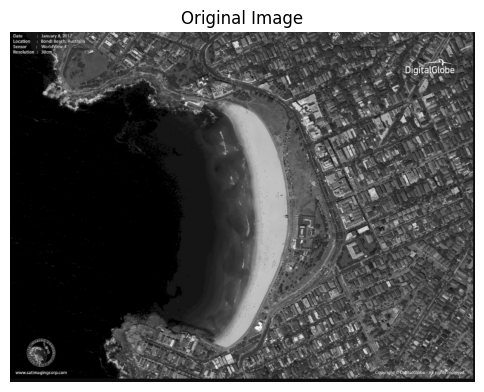

In [ ]:
# Load the original image in grayscale
image_path = "house-3.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


## **Step 1: Apply Fourier Transform (FFT) to Remove Noise**

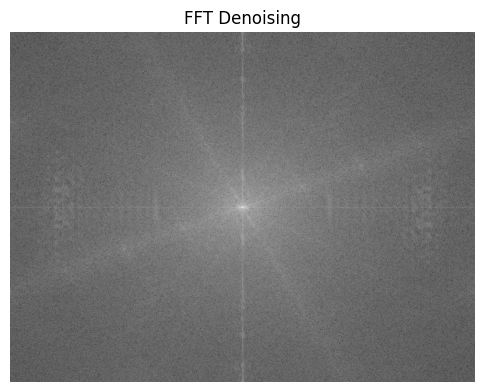

In [ ]:
# Apply Fourier Transform (FFT)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = np.log(np.abs(f_shift) + 6)

plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Denoising")
plt.axis("off")
plt.show()


## **Explanation**
* Fourier Transform (FFT) is used to convert the image from the spatial domain to the frequency domain, allowing noise components to be identified and removed.
* Shifting the low frequencies to the center helps in isolating unwanted high-frequency noise caused by atmospheric interference.
* Applying logarithmic scaling enhances the visibility of frequency components, making it easier to filter out unwanted noise.

## **Step 2: Use Contrast Stretching to Highlight Affected Regions**


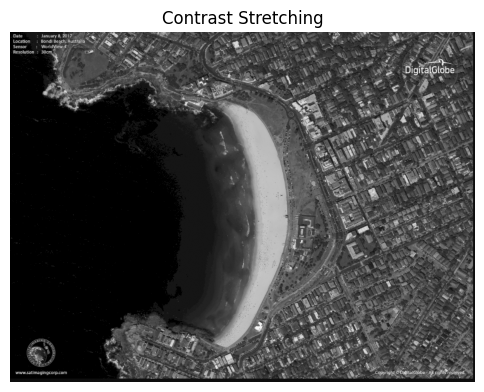

In [ ]:
# Normalize pixel values for contrast stretching
contrast_stretched = (image - np.min(image)) * (255 / (np.max(image) - min_val))
contrast_stretched = np.uint8(contrast_stretched)
plt.figure(figsize=(6, 6))
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Stretching")
plt.axis("off")
plt.show()


# **Explanation**
* Contrast stretching normalizes pixel intensity values, making subtle differences in land features more visible.
* By expanding the pixel range, darker and brighter regions become more distinct, improving disaster identification.
* This technique helps in highlighting water bodies, burned areas, and damaged infrastructure in satellite images.

## **Step 3: Apply Power-Law Transformation (Gamma Correction) to Enhance Different Land Types**

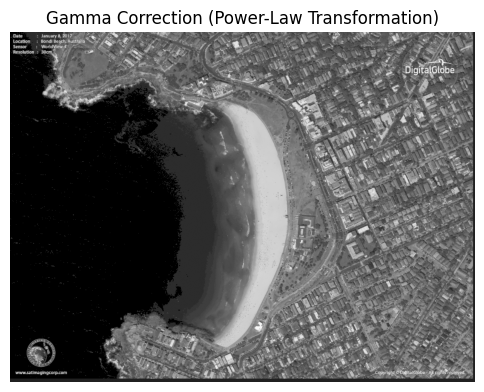

In [ ]:
image_normalized = image / 255.0  #
gamma_corrected = np.power(image_normalized, 0.7) * 255
gamma_corrected = np.uint8(gamma_corrected)
# Display the gamma-corrected image
plt.figure(figsize=(6, 6))
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Gamma Correction (Power-Law Transformation)")
plt.axis("off")
plt.show()


# **Explanation**
* power-law transformation (Gamma Correction) adjusts brightness non-linearly, making different land types more distinguishable.
* A gamma value less than 1 enhances darker areas, while a gamma greater than 1 enhances bright regions.
* This helps in differentiating vegetation, water bodies, and infrastructure, ensuring a better classification of affected regions.

## **Step 4: Compute Mean and Variance to Detect High-Reflectance Areas**


In [ ]:
mean_val, stddev = cv2.meanStdDev(image)
print(f"Mean Intensity: {mean_val[0][0]:.2f}, Variance: {stddev[0][0] ** 2 :.2f}")


Mean Intensity: 60.45, Variance: 2671.14


## **Explanation**
* Mean intensity represents the average brightness of the image, while variance indicates the spread of pixel values.
* High-reflectance areas such as water bodies or snow-covered regions have higher variance, making them easier to identify.
* By computing these values, dynamic adjustments can be made to improve visibility in disaster-struck areas.


## **Step 5: Apply Thresholding to Separate Affected Regions from Normal Land**


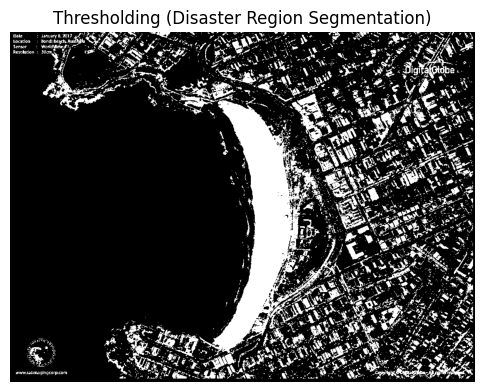

In [ ]:
# Apply binary thresholding
_, thresholded_image = cv2.threshold(image, 98, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6, 6))
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholding (Disaster Region Segmentation)")
plt.axis("off")
plt.show()


## **Explanation**
* Thresholding segments the image into affected and unaffected regions, making disaster zones easier to analyze.
* Pixels above a certain intensity are set to white (255), while those below are set to black (0), effectively isolating damage.
* This method is used to generate disaster maps, allowing relief agencies to focus on the most affected areas.



---



# **Scenario 4: Enhancing Old Manuscripts for Digital Archiving**
>Old manuscripts are enhanced by computing mean and variance for brightness analysis, applying log transformation for faded text, and gray-level transformation for lighting correction. Contrast stretching improves text readability, while thresholding isolates text for digital archiving and OCR applications.


## **Display Original Image**


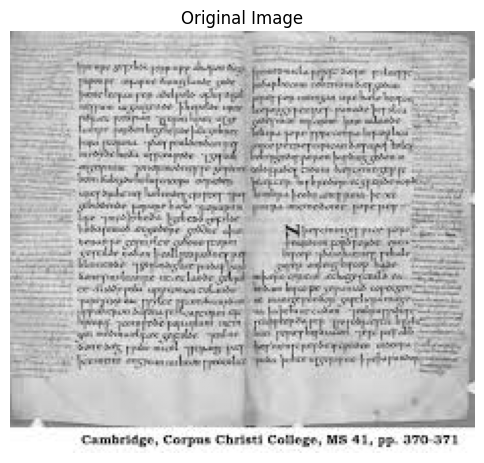

In [ ]:
# Load the original grayscale image
image_path = "page-4.png"  # Change path accordingly
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


## **Step 1: Compute Mean and Variance to Identify Faded Ink and Uneven Lighting**

In [ ]:
# Compute mean and variance of pixel intensities
mean_val, stddev = cv2.meanStdDev(image)
print(f"Mean Intensity: {mean_val[0][0]:.2f},\nVariance : {stddev[0][0] ** 2  :.2f}")


Mean Intensity: 188.18,
Variance : 1264.43


## **Explanation**
* Mean intensity helps in analyzing overall brightness, indicating whether the document is too dark or too light.
* Variance measures the spread of pixel intensities, detecting regions with uneven lighting or ink fading.
* These values help decide the required enhancement techniques to improve text visibility.

## **Step 2: Apply Log Transformation to Enhance Faded Text**

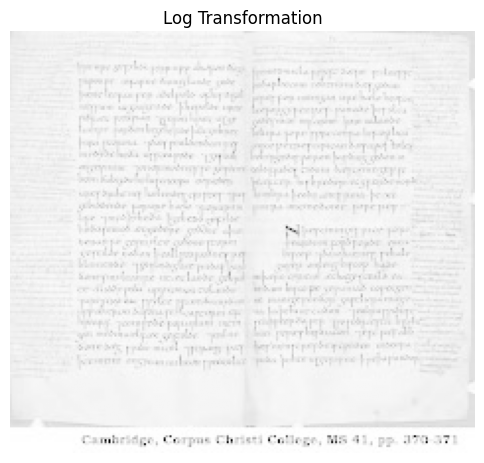

In [ ]:
# Apply log transformation
log_transformed = np.log1p(image)
log_transformed = (log_transformed / np.max(log_transformed)) * 255
log_transformed = np.uint8(log_transformed)
plt.figure(figsize=(6, 6))
plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transformation")
plt.axis("off")
plt.show()


## **Explanation**
* Log transformation enhances low-intensity pixels, making faint ink more visible.
* It increases contrast in darker areas, bringing out faded text without overexposing the bright regions.
* This technique is used for restoring old, dimly lit manuscripts and improving text clarity.

## **Step 3: Apply Gray-Level Transformation to Balance Lighting**


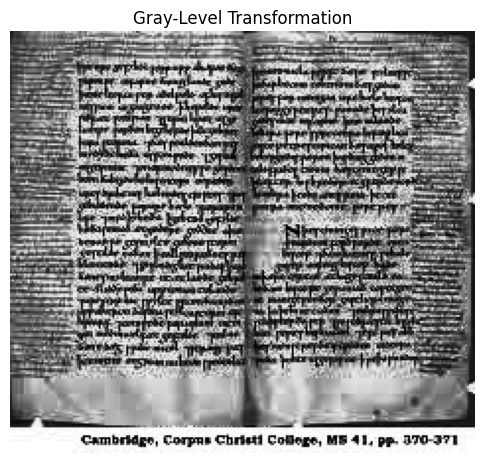

In [ ]:
# Apply histogram equalization for gray-level transformation
gray_level_transformed = cv2.equalizeHist(image)
plt.figure(figsize=(6, 6))
plt.imshow(gray_level_transformed, cmap='gray')
plt.title("Gray-Level Transformation")
plt.axis("off")
plt.show()


## **Explanation**
* Gray-level transformation adjusts pixel intensities, ensuring uniform lighting across the document.
* It enhances faded sections while maintaining the original structure, avoiding excessive brightness changes.
* This technique is widely used in scanned historical documents to remove uneven lighting effects.

## **Step 4: Apply Contrast Stretching to Improve Readability**


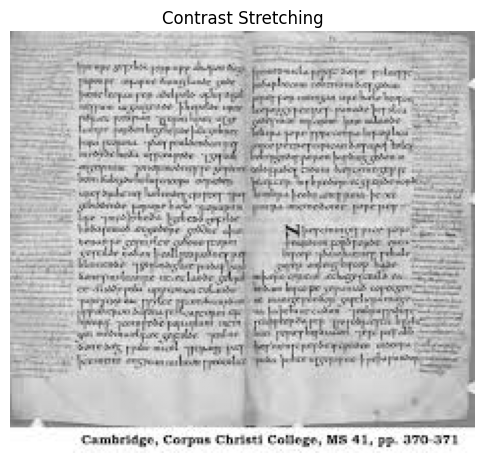

In [ ]:
# Normalize pixel values for contrast stretching
contrast_stretched = (image - np.min(image)) * (255 / (np.max(image) - min_val))
contrast_stretched = np.uint8(contrast_stretched)

# Display the contrast-stretched image
plt.figure(figsize=(6, 6))
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Stretching")
plt.axis("off")
plt.show()


## **Explanation**
* Contrast stretching normalizes pixel intensity values, making text stand out against the background.
* It spreads the intensity range from minimum to maximum, improving text contrast without distorting the image.
* This technique is essential for old, low-contrast manuscripts where text blends with the background.

## **Step 5: Apply Thresholding to Extract Text from the Background**

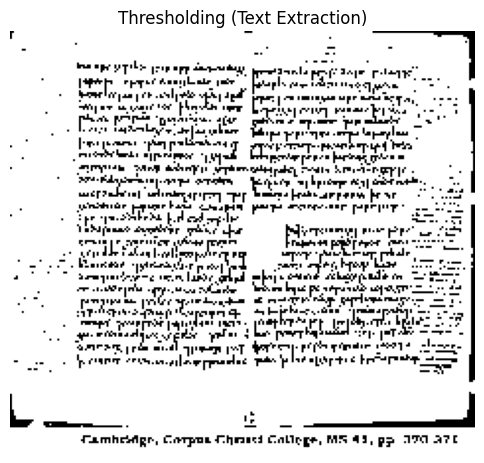

In [ ]:
# Apply binary thresholding
threshold_value = 150  # Adjust threshold based on document brightness
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.figure(figsize=(6, 6))
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholding (Text Extraction)")
plt.axis("off")
plt.show()


## **Explanation**
* Thresholding converts the image into black and white, isolating text from the background.
* Pixels above a certain intensity are set to white (255), and those below are set to black (0), effectively removing background noise.
* This method prepares the manuscript for OCR (Optical Character Recognition), allowing digital text extraction.



---

